<a href="https://colab.research.google.com/github/ash-01xor/Data-Analysis/blob/main/Detailed_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11503 non-null  float64
 5   Engine Cylinders   11411 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11503.000000,11411.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.304355,5.631321,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.176671,1.780997,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP             411
Engine Cylinders      503
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
print("The percentage of null values in the columns consisting of null values:\n")
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("null rate of {} column: {}%".format(i,round(null_rate,3)))

The percentage of null values in the columns consisting of null values:

null rate of Engine Fuel Type column: 0.025%
null rate of Engine HP column: 3.45%
null rate of Engine Cylinders column: 4.222%
null rate of Number of Doors column: 0.05%
null rate of Market Category column: 31.408%


#### Distribution of Datatypes:

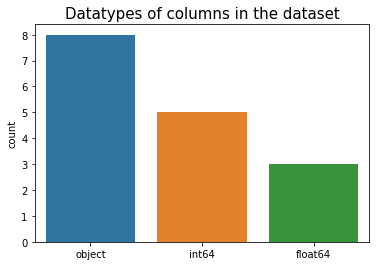

Count of the datatypes of columns
object     8
int64      5
float64    3
dtype: int64


In [10]:
sns.countplot(df.dtypes)
plt.title("Datatypes of columns in the dataset",fontsize=15)
plt.show()
print("Count of the datatypes of columns")
print(df.dtypes.value_counts())

### Handling the missing values

#### Engine Fuel Type:

In [11]:
df['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [12]:
print(df[df["Engine Fuel Type"].isnull()])

         Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN        NaN               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Market Category  \
11321         AUTOMATIC  front wheel drive              4.0             NaN   
11322         AUTOMATIC  front wheel drive              4.0             NaN   
11323         AUTOMATIC  front wheel drive              4.0             NaN   

      Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321      Midsize         Sedan           25        17         481  17199  
11322      Midsize         Sedan           25        17         481  20199  
11323      Midsize         Sedan           25        17         481  18499  


In [13]:
df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0],inplace=True)

#### Engine HP:

In [14]:
df['Engine HP'].value_counts().head(20)

200.0    444
170.0    338
210.0    315
240.0    264
185.0    237
285.0    233
150.0    226
138.0    194
300.0    185
220.0    169
355.0    155
155.0    153
381.0    145
160.0    142
140.0    141
180.0    133
260.0    128
290.0    127
190.0    126
420.0    125
Name: Engine HP, dtype: int64

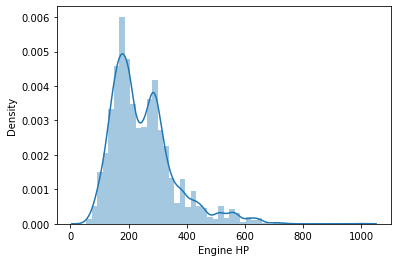

In [15]:
sns.distplot(df['Engine HP'])
plt.show()

In [16]:
# the distribution shows that the values present in the column is positively skewed	
df['Engine HP'].fillna(df['Engine HP'].median(),inplace=True)
df['Engine HP'].isnull().sum()

0

#### Engine Cylinders

In [17]:
df['Engine Cylinders'].value_counts()

4.0     4553
6.0     4318
8.0     1954
12.0     221
5.0      214
10.0      65
0.0       54
3.0       29
16.0       3
Name: Engine Cylinders, dtype: int64

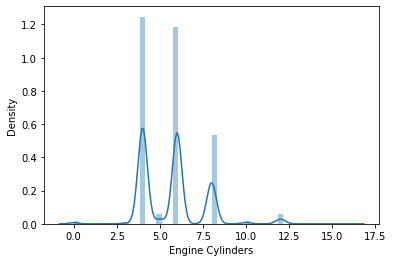

In [18]:
sns.distplot(df['Engine Cylinders'])
plt.show()

In [19]:
df['Engine Cylinders'].skew()

0.9627292110510476

In [20]:
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(),inplace=True)
df['Engine Cylinders'].isnull().sum()

0

#### Number of Doors:

In [21]:
df['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [22]:
print(df[df["Number of Doors"].isnull()])

         Make    Model  Year             Engine Fuel Type  Engine HP  \
4666  Ferrari       FF  2013  premium unleaded (required)      227.0   
6930    Tesla  Model S  2016                     electric      227.0   
6931    Tesla  Model S  2016                     electric      227.0   
6932    Tesla  Model S  2016                     electric      227.0   
6933    Tesla  Model S  2016                     electric      227.0   
6934    Tesla  Model S  2016                     electric      227.0   

      Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
4666         12.000000  AUTOMATED_MANUAL   all wheel drive              NaN   
6930          5.631321      DIRECT_DRIVE   all wheel drive              NaN   
6931          0.000000      DIRECT_DRIVE   all wheel drive              NaN   
6932          0.000000      DIRECT_DRIVE   all wheel drive              NaN   
6933          0.000000      DIRECT_DRIVE  rear wheel drive              NaN   
6934          0.00000

In [23]:
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0],inplace=True)
df['Number of Doors'].isnull().sum()

0

#### Market Category:

In [24]:
df['Market Category'].value_counts().head(15)

Crossover                                1110
Flex Fuel                                 872
Luxury                                    855
Luxury,Performance                        673
Hatchback                                 641
Performance                               601
Crossover,Luxury                          410
Luxury,High-Performance                   334
Exotic,High-Performance                   261
Hatchback,Performance                     252
Factory Tuner,Luxury,High-Performance     215
High-Performance                          199
Hybrid                                    123
Crossover,Luxury,Performance              113
Factory Tuner,High-Performance            106
Name: Market Category, dtype: int64

In [25]:
df['Market Category'].fillna(df['Market Category'].mode()[0],inplace=True)
df['Market Category'].isnull().sum()

0

<b>Checking the missing values after filling them</b>


In [26]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Handling Outliers in Numeric data type:

In [27]:
nv= df.dtypes!='object'
lnv=list(nv[nv].index)
print("Numerical Variables:")
print(lnv)

Numerical Variables:
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [28]:
l=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            l.append(i)
    print("Outliers:\n",l)

In [29]:
def drop_outliers(df, col_name):
    iqr = 1.5 * (np.percentile(df[col_name], 75) - np.percentile(df[col_name], 25))
    df.drop(df[df[col_name] > (iqr + np.percentile(df[col_name], 75))].index, inplace=True)
    df.drop(df[df[col_name] < (np.percentile(df[col_name], 25) - iqr)].index, inplace=True)

In [30]:
for i in lnv:
  drop_outliers(df,i)

<b> After droping all the outliers in the numeric columns in the dataset</b>

In [31]:
df.shape

(9062, 16)

### <b>Univariate Analysis:</b>

In [32]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### <b>Numerical Features:</b>

In [33]:
nv= (df.dtypes!='object')
lnv=list(nv[nv].index)
print("Numerical Features:")
print(lnv)

Numerical Features:
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


#### **Year:**

In [34]:
df['Year'].value_counts()

2015    1700
2016    1691
2017    1290
2014     422
2007     317
2012     315
2009     310
2008     305
2013     297
2010     254
2011     240
2003     195
2004     195
2006     179
2005     177
2002     173
1994     157
2001     145
1997     140
1998     125
1995     119
2000     113
1996     109
1999      94
Name: Year, dtype: int64

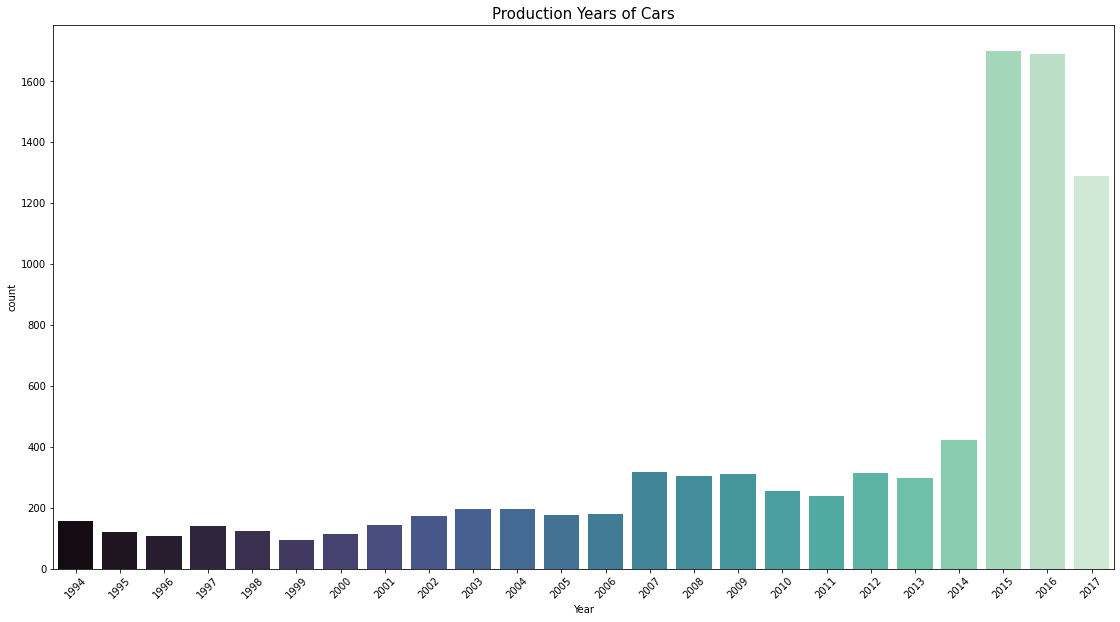

In [35]:
plt.figure(figsize=(19,10))
plt.title("Production Years of Cars",fontsize=15)
c1=sns.countplot(x='Year',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

### <b>Engine HP:<b>

In [36]:
df['Engine HP'].value_counts().head(20)

200.0    379
227.0    317
210.0    299
170.0    295
240.0    260
185.0    234
285.0    231
138.0    183
150.0    182
300.0    181
355.0    155
155.0    147
381.0    142
220.0    123
260.0    123
190.0    123
250.0    116
290.0    110
180.0    107
280.0    106
Name: Engine HP, dtype: int64

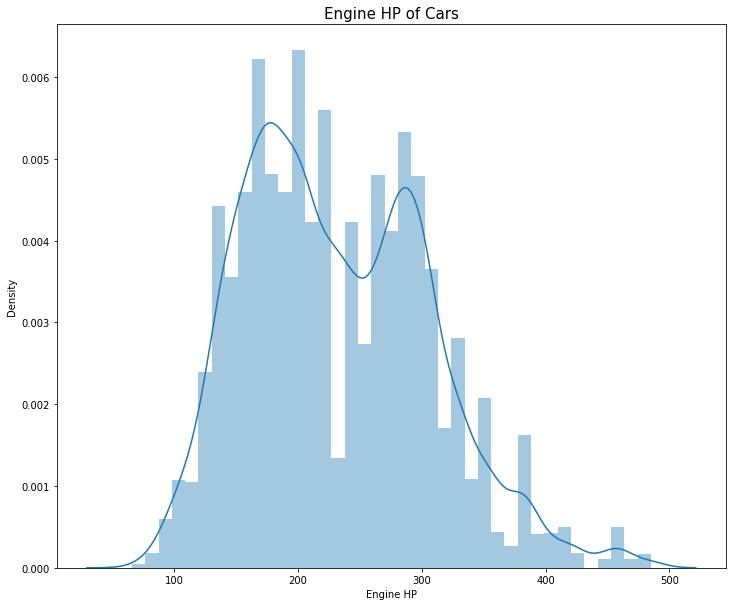

In [37]:
plt.figure(figsize=(12,10))
plt.title("Engine HP of Cars",fontsize=15)
sns.distplot(df['Engine HP'])
plt.show()

### <b>Engine Cylinder:</b>

In [38]:
df['Engine Cylinders'].value_counts()

4.000000    3852
6.000000    3518
8.000000    1122
5.631321     373
5.000000     195
3.000000       2
Name: Engine Cylinders, dtype: int64

In [39]:
df['Engine Cylinders'].skew()

0.5344638518043549

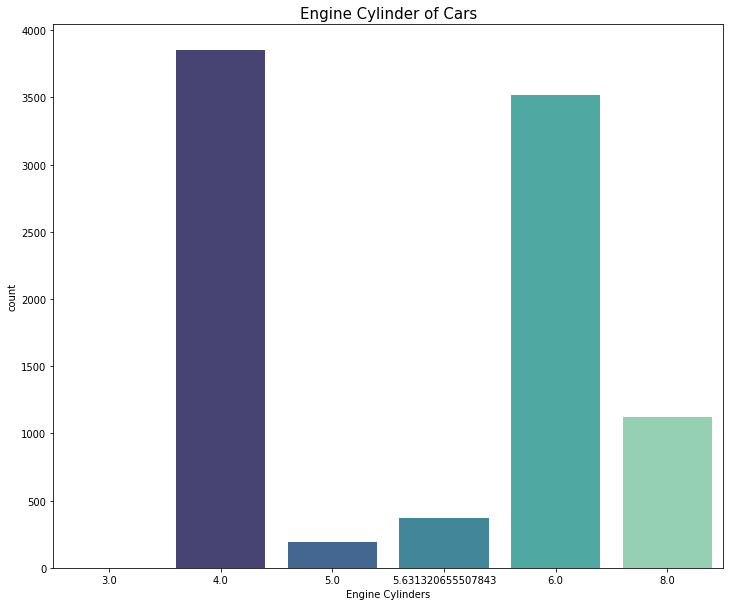

In [40]:
plt.figure(figsize=(12,10))
plt.title("Engine Cylinder of Cars",fontsize=15)
c1=sns.countplot(df['Engine Cylinders'],palette="mako")
plt.show()

### <b>Highway MPG:</b>

In [41]:
df['highway MPG'].value_counts()

24    695
23    639
26    630
28    622
25    607
31    517
22    503
27    498
30    483
29    387
33    383
20    323
21    315
32    305
18    287
17    277
34    273
19    244
35    208
36    197
37    163
38    125
16     88
40     81
39     71
41     50
42     33
15     28
43     15
14     13
44      1
13      1
Name: highway MPG, dtype: int64

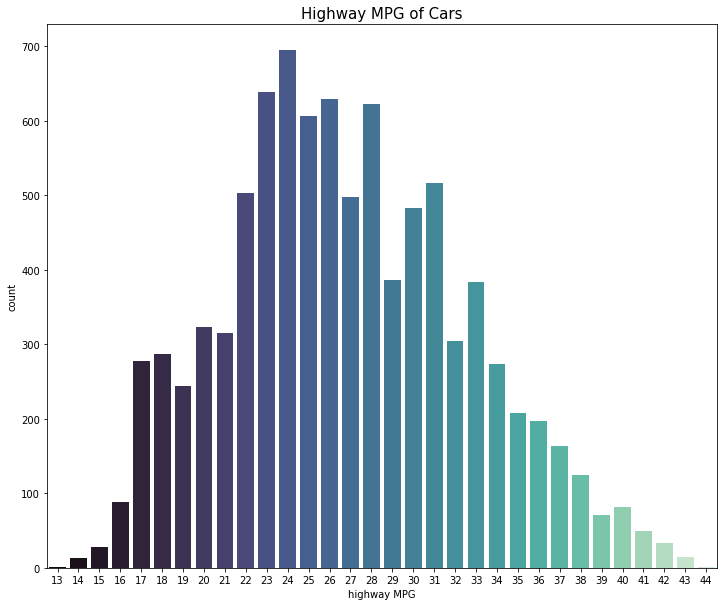

In [42]:
plt.figure(figsize=(12,10))
plt.title("Highway MPG of Cars",fontsize=15)
sns.countplot(df['highway MPG'],palette="mako")
plt.show()

### <b>No of Doors:</b>

In [43]:
df['Number of Doors'].value_counts()

4.0    6828
2.0    1997
3.0     237
Name: Number of Doors, dtype: int64

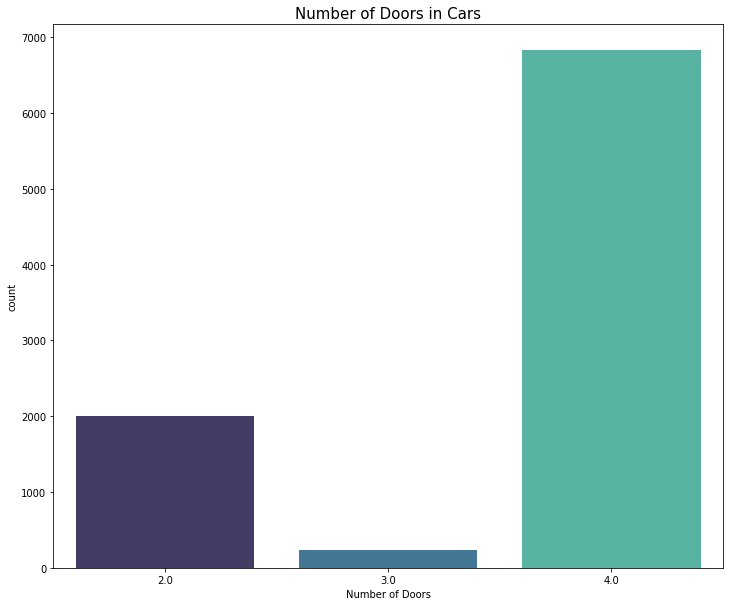

In [44]:
plt.figure(figsize=(12,10))
plt.title("Number of Doors in Cars",fontsize=15)
c1=sns.countplot(df['Number of Doors'],palette="mako")
plt.show()

### <b>City mpg:</b>

In [45]:
df['city mpg'].value_counts()

17    1008
16     855
18     850
19     714
20     692
15     648
22     554
21     549
23     459
24     448
25     429
14     394
13     355
27     232
26     202
28     159
12     123
30     116
31     113
29      95
11      66
10       1
Name: city mpg, dtype: int64

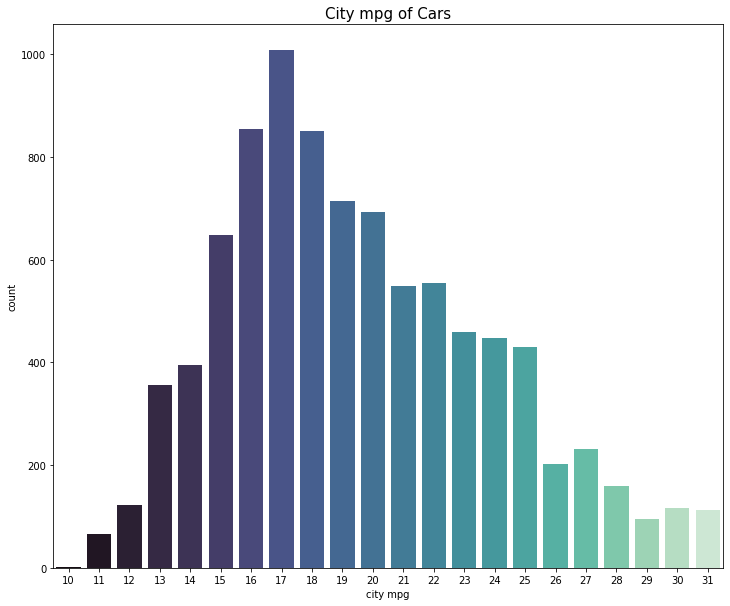

In [46]:
plt.figure(figsize=(12,10))
plt.title("City mpg of Cars",fontsize=15)
c1=sns.countplot(df['city mpg'],palette="mako")
plt.show()

### <b>Popularity:</b>

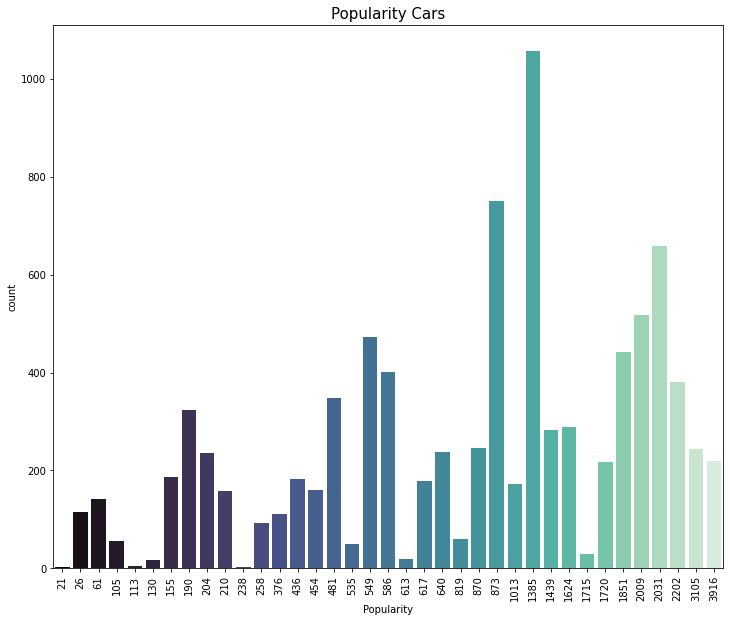

In [47]:
plt.figure(figsize=(12,10))
plt.title("Popularity Cars",fontsize=15)
c1=sns.countplot(df['Popularity'],palette="mako")
plt.xticks(rotation=90)
plt.show()

#### <b>Categorical Features:</b>

In [48]:
cv= df.dtypes=='object'
lcv=list(cv[cv].index)
print("Categorical Variables:")
print(lcv)

Categorical Variables:
['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style']


In [49]:
for i in lcv:
  print("Column name:",i)
  print(df[i].unique())

Column name: Make
['BMW' 'Audi' 'FIAT' 'Chrysler' 'Nissan' 'Mazda' 'Mitsubishi' 'Alfa Romeo'
 'Toyota' 'Porsche' 'Volvo' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Kia' 'Chevrolet' 'Cadillac' 'Dodge' 'Lincoln'
 'Pontiac' 'Subaru' 'Volkswagen' 'Mercedes-Benz' 'Buick' 'Acura'
 'Land Rover' 'Lotus' 'Lexus' 'Infiniti' 'Scion' 'Genesis' 'Maserati'
 'HUMMER']
Column name: Model
['1 Series M' '1 Series' '100' '124 Spider' '2 Series' '200' '200SX'
 '240SX' '2' '3 Series Gran Turismo' '3 Series' '3000GT' '300' '300M'
 '300ZX' '323' '350Z' '370Z' '3' '4 Series Gran Coupe' '4 Series' '4C'
 '4Runner' '5 Series Gran Turismo' '5 Series' '500' '500L' '500X' '5'
 '626' '6' '718 Cayman' '8 Series' '850' '86' '9-2X' '9-3 Griffin'
 '09-Mar' '9-4X' '09-May' '9-7X' '9000' '900' '90' '928' '929' '940' '960'
 '968' 'A3' 'A4 allroad' 'A4' 'A5' 'A6' 'A7' 'Acadia Limited' 'Acadia'
 'Accent' 'Acclaim' 'Accord Crosstour' 'Accord' 'Achieva' 'ActiveHybrid 5'
 'Aerio' 'Alero' 'allroad quattro'

### <b>Make:</b>

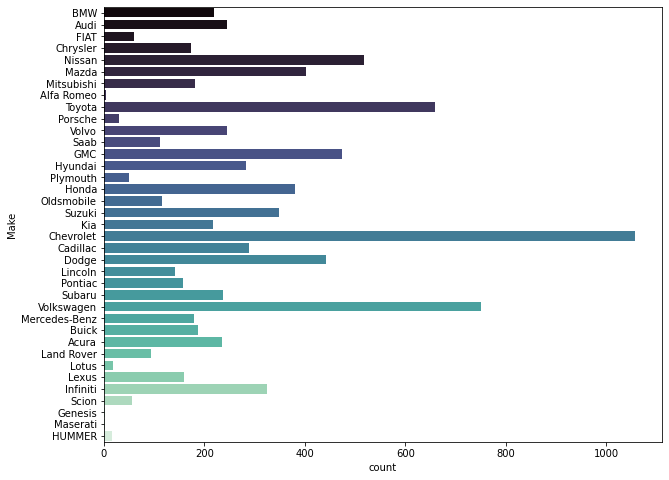

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(y='Make', data=df,palette="mako")
plt.show()

### <b>Model:</b>

In [51]:
Model=df['Model'].value_counts().head(20)
Model

Silverado 1500        156
Tundra                140
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
GTI                    76
Frontier               76
Beetle                 75
Accord                 75
Dakota                 65
Ram Pickup 1500        62
Civic                  58
C/K 1500 Series        56
Colorado               54
XC60                   54
Jetta                  53
3                      53
Sienna                 51
370Z                   51
Golf GTI               50
Name: Model, dtype: int64

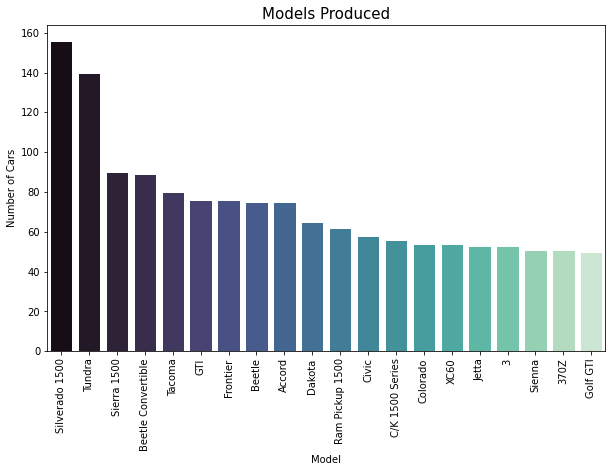

In [52]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Models Produced",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(Model.index,Model,palette="mako")
a.set_xticklabels(Model.index ,rotation=90)
a.set(xlabel='Model', ylabel='Number of Cars')
plt.show()

### <b>Engine Fuel Type:</b>

In [53]:
df['Engine Fuel Type'].value_counts()

regular unleaded                                5737
premium unleaded (recommended)                  1380
premium unleaded (required)                     1138
flex-fuel (unleaded/E85)                         645
diesel                                           124
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
flex-fuel (premium unleaded required/E85)          4
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

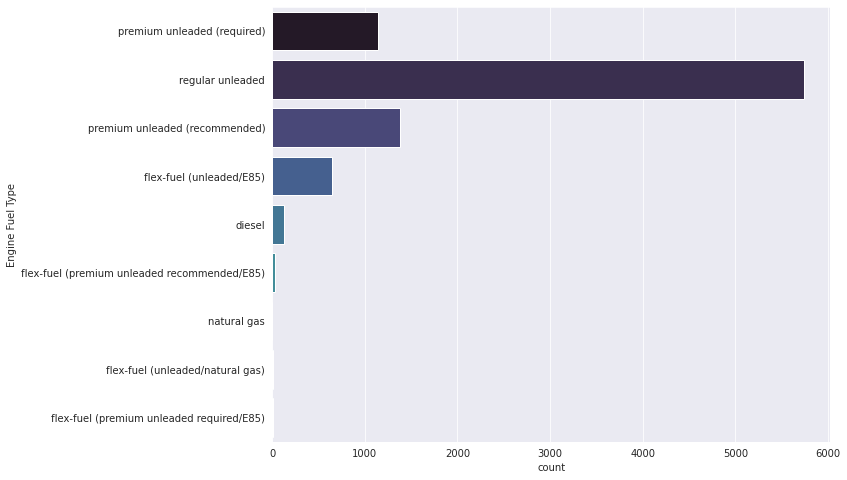

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(y='Engine Fuel Type', data=df,palette="mako")
plt.show()

### <b>Transmission Type:</b>

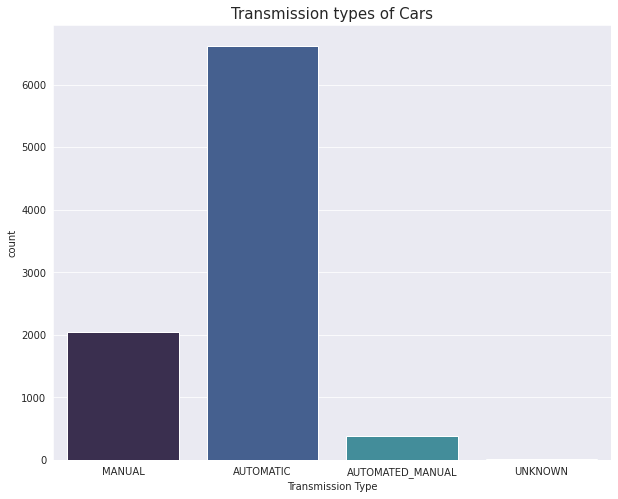

In [55]:
plt.figure(figsize=(10,8))
plt.title("Transmission types of Cars",fontsize=15)
sns.countplot(x='Transmission Type', data=df,palette="mako")
plt.show()

### <b>Driven Wheels:</b>

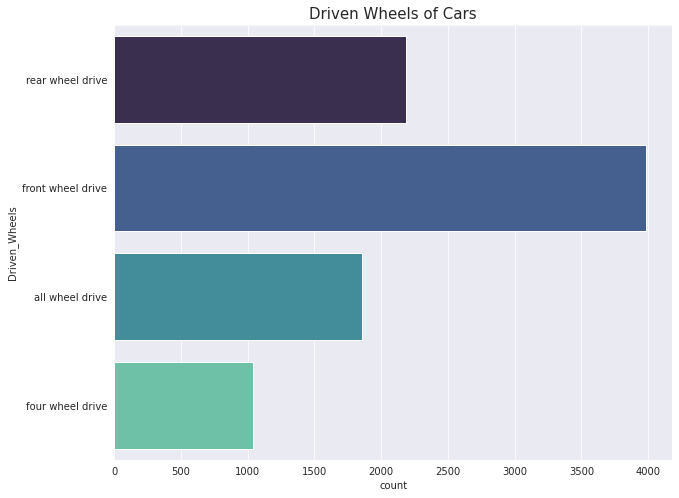

In [56]:
plt.figure(figsize=(10,8))
plt.title("Driven Wheels of Cars",fontsize=15)
sns.countplot(y='Driven_Wheels', data=df,palette="mako")
plt.show()

### <b>Market Category:<b>

In [57]:
Market_Cat=df['Market Category'].value_counts().head(20)
Market_Cat

Crossover                                4008
Luxury                                    698
Flex Fuel                                 683
Luxury,Performance                        556
Performance                               552
Hatchback                                 472
Crossover,Luxury                          410
Hatchback,Performance                     236
High-Performance                          180
Luxury,High-Performance                   154
Factory Tuner,Luxury,High-Performance     105
Crossover,Luxury,Performance               95
Factory Tuner,Performance                  77
Flex Fuel,Performance                      75
Crossover,Hatchback                        72
Diesel                                     63
Factory Tuner,High-Performance             61
Crossover,Performance                      53
Crossover,Flex Fuel                        52
Hatchback,Luxury                           39
Name: Market Category, dtype: int64

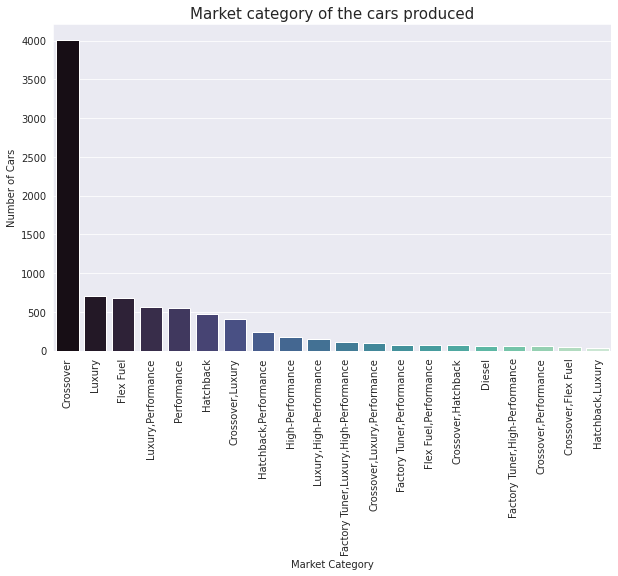

In [58]:
plt.figure(figsize=(10,6))
plt.tight_layout(pad=3)
plt.title("Market category of the cars produced",fontsize=15)
sns.set_style("darkgrid")
a=sns.barplot(Market_Cat.index,Market_Cat,palette="mako")
a.set_xticklabels(Market_Cat.index ,rotation=90)
a.set(xlabel='Market Category', ylabel='Number of Cars')
plt.show()

### <b>Vehicle Size:</b>

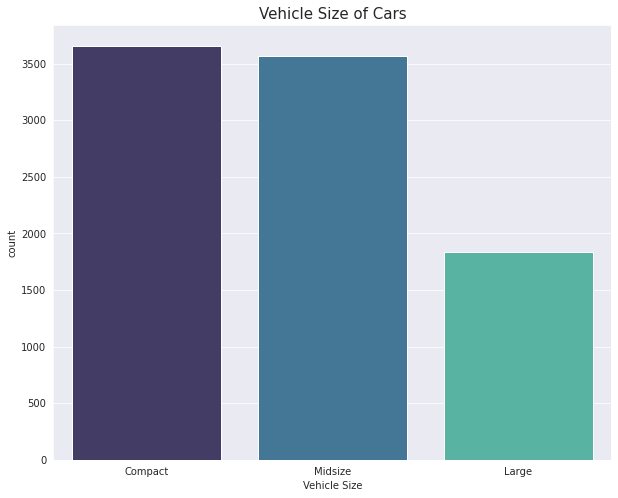

In [59]:
plt.figure(figsize=(10,8))
plt.title("Vehicle Size of Cars",fontsize=15)
sns.countplot(x='Vehicle Size', data=df,palette="mako")
plt.show()

### <b>Vehicle Style:</b>

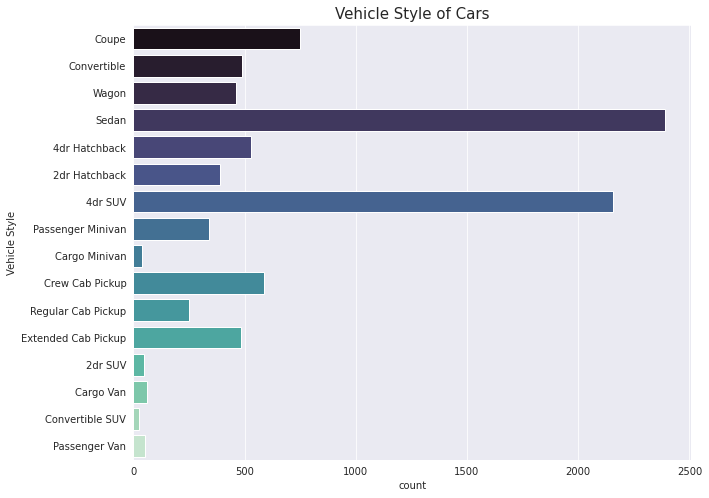

In [60]:
plt.figure(figsize=(10,8))
plt.title("Vehicle Style of Cars",fontsize=15)
sns.countplot(y='Vehicle Style', data=df,palette="mako")
plt.show()

## <b>Multivariate Analysis:</b>

#### average engine HP for rear wheel drive with manual transmission type

In [61]:
grp = df.groupby(['Driven_Wheels','Transmission Type'])

In [62]:
grp['Engine HP'].mean()

Driven_Wheels      Transmission Type
all wheel drive    AUTOMATED_MANUAL     270.804124
                   AUTOMATIC            253.492298
                   MANUAL               242.683824
four wheel drive   AUTOMATIC            286.377381
                   MANUAL               188.014925
                   UNKNOWN              190.000000
front wheel drive  AUTOMATED_MANUAL     195.061151
                   AUTOMATIC            202.972041
                   MANUAL               161.075298
                   UNKNOWN              150.000000
rear wheel drive   AUTOMATED_MANUAL     246.461538
                   AUTOMATIC            282.428387
                   MANUAL               250.255285
                   UNKNOWN              259.000000
Name: Engine HP, dtype: float64

In [66]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### Manufacturer with respective to transimission type:

In [63]:
grp1 = df.groupby(['city mpg','Make','Vehicle Style'])
grp['Make'].max()

Driven_Wheels      Transmission Type
all wheel drive    AUTOMATED_MANUAL     Volkswagen
                   AUTOMATIC                 Volvo
                   MANUAL                    Volvo
four wheel drive   AUTOMATIC                Toyota
                   MANUAL                   Toyota
                   UNKNOWN                     GMC
front wheel drive  AUTOMATED_MANUAL     Volkswagen
                   AUTOMATIC                 Volvo
                   MANUAL                    Volvo
                   UNKNOWN              Oldsmobile
rear wheel drive   AUTOMATED_MANUAL         Toyota
                   AUTOMATIC                 Volvo
                   MANUAL                   Toyota
                   UNKNOWN                 Pontiac
Name: Make, dtype: object

In [83]:
grp1['Market Category'].value_counts().head(30)

city mpg  Make        Vehicle Style        Market Category             
10        GMC         Extended Cab Pickup  Crossover                        1
11        Chevrolet   4dr SUV              Crossover                        1
                      Extended Cab Pickup  Crossover                        2
                      Passenger Van        Flex Fuel                       15
                                           Crossover                        4
          Dodge       Passenger Van        Crossover                        2
          GMC         4dr SUV              Crossover                        1
                                           Luxury                           1
                      Cargo Van            Flex Fuel                       12
                      Passenger Van        Flex Fuel                       15
                                           Crossover                        2
          Land Rover  4dr SUV              Luxury                     

In [85]:
def getrange(Price):
    if (Price >= 0 and Price < 25000):
        return '0 - 25000'
    if (Price >= 25000 and Price < 50000):
        return '25000 - 50000'
    if (Price >= 50000 and Price < 75000):
        return '50000 - 75000'
    if (Price >= 75000 and Price < 100000):
        return '75000 - 100000'
       
df['Price Range'] = df.apply(lambda x:getrange(x['MSRP']),axis = 1)

df['Price Range'].value_counts()

25000 - 50000    4993
0 - 25000        3192
50000 - 75000     877
Name: Price Range, dtype: int64

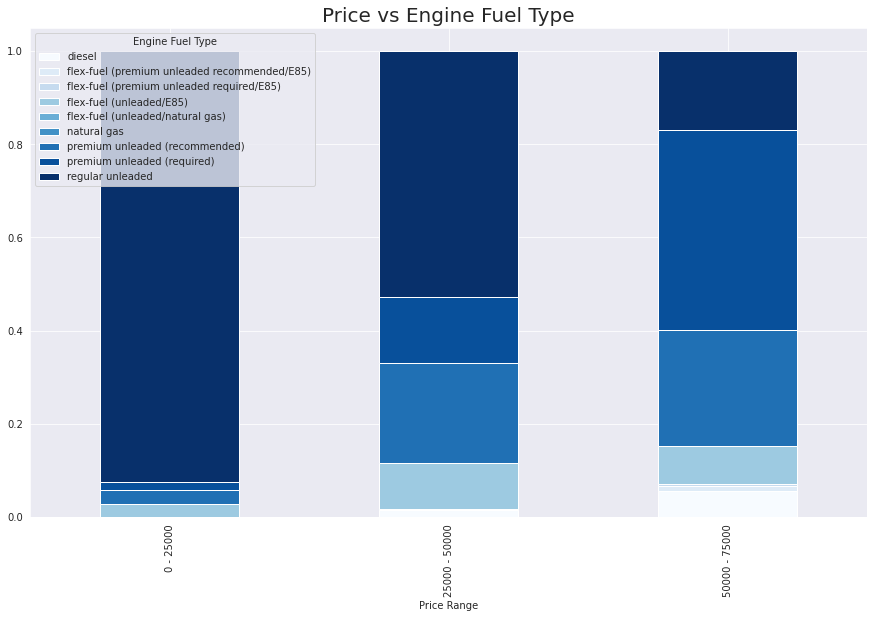

In [94]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(df['Price Range'],df['Engine Fuel Type'])
color = plt.cm.Blues(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Price vs Engine Fuel Type",fontweight = 30,fontsize = 20)
plt.show()

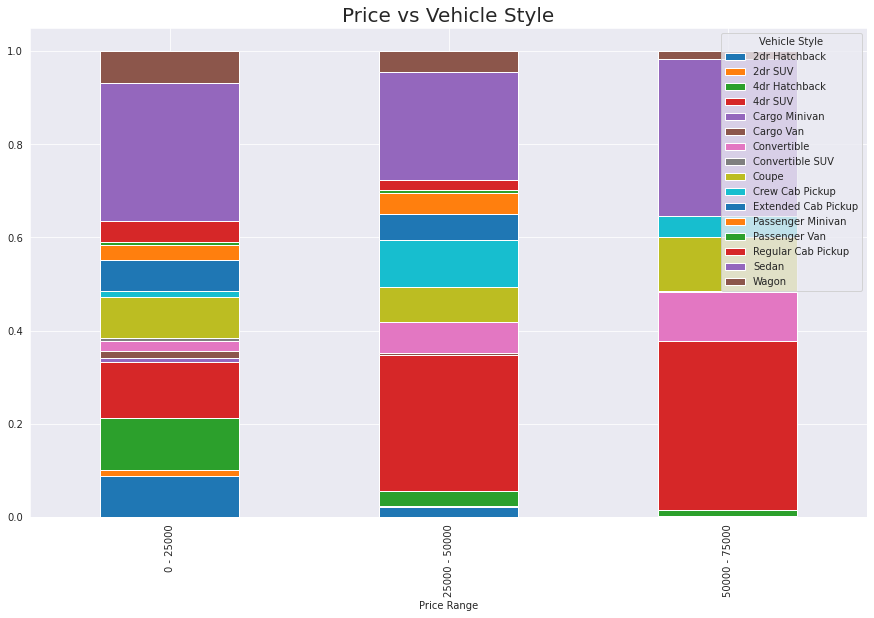

In [121]:
plt.rcParams['figure.figsize'] = (15,9)

x = pd.crosstab(df['Price Range'],df['Vehicle Style'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title("Price vs Vehicle Style",fontweight = 30,fontsize = 20)
plt.show()

In [104]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(df['Price Range'],df['Driven_Wheels'])
x.div(x.sum(1).astype(float),axis = 0)
x

Driven_Wheels,all wheel drive,four wheel drive,front wheel drive,rear wheel drive
Price Range,,,,
0 - 25000,215,220,2148,609
25000 - 50000,1294,703,1786,1210
50000 - 75000,347,120,46,364


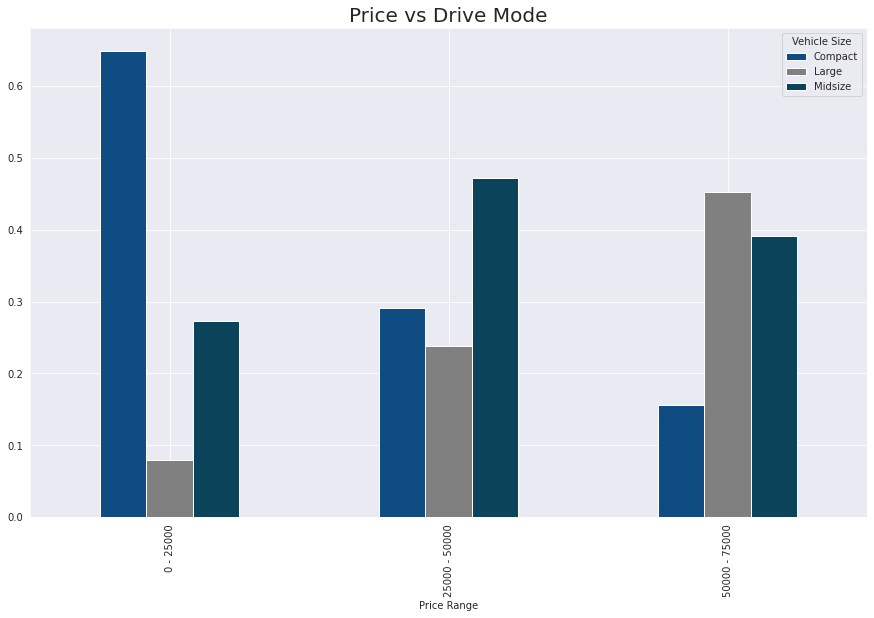

In [119]:
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False,color=["#0f4c81","#808080","#0b445a"])
plt.title('Price vs Drive Mode',fontweight = 30,fontsize = 20)
plt.show()

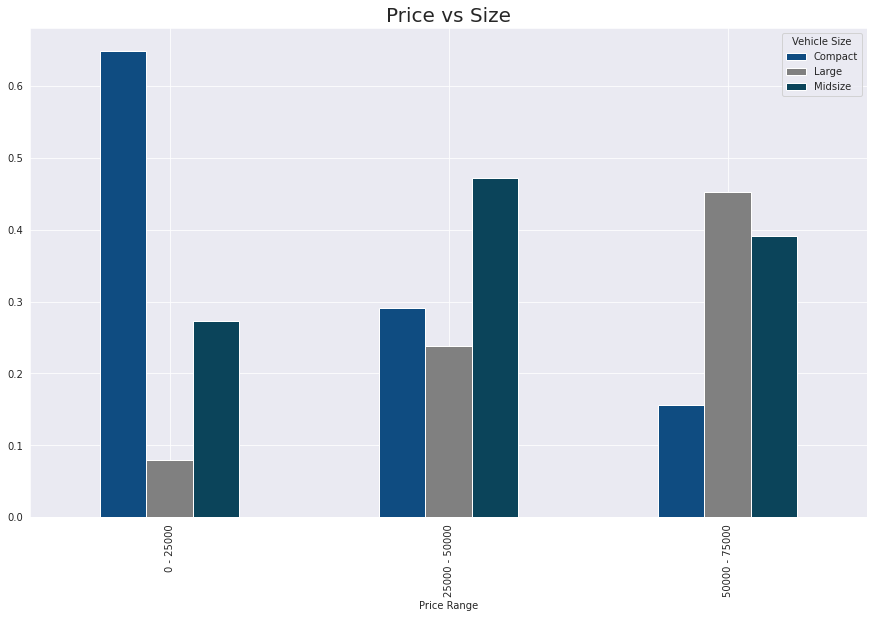

In [120]:
plt.rcParams['figure.figsize'] = (15,9)
x = pd.crosstab(df['Price Range'],df['Vehicle Size'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False,color=["#0f4c81","#808080","#0b445a"])
plt.title('Price vs Size',fontweight = 30,fontsize = 20)
plt.show()